In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load data

In [ ]:
import json

with open("denman_bounding_box.json") as f:
    bounds = json.load(f)

In [2]:
vel = xr.load_dataset("data/ice_velocity/antarctic_ice_vel_phase_map_v01_denman.nc")
# Define the velocity magnitude
vel["magnitude"] = np.sqrt(vel.VX**2 + vel.VY**2)

## Custom colorscale

- logarithmic scale inspired by [this NASA article](https://earthobservatory.nasa.gov/images/146709/denman-glacier-losing-some-of-its-footing)

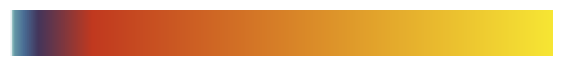

In [3]:
# Define color stops (positions from 0 to 1)
positions = [0.0, 0.1, 2.0, 5.0, 10.0, 50.0, 100.0, 300.0, 2000.0]  # uneven spacing
positions = np.array(positions) / 2000.0

# Define corresponding RGB or hex colors
colors = ["#eff5f8", "#CEE3E4", "#B3D2CD", "#9ACAC2", "#669AA8", "#486A93", "#43355B", "#C1391F", "#F7E634"]

# Create the custom colormap
icevel_cmap = LinearSegmentedColormap.from_list("custom_irregular", list(zip(positions, colors)))

# Display the colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)

plt.figure(figsize = (7, 0.6))
plt.imshow(gradient, aspect = "auto", cmap = icevel_cmap)
plt.axis("off")
plt.show()

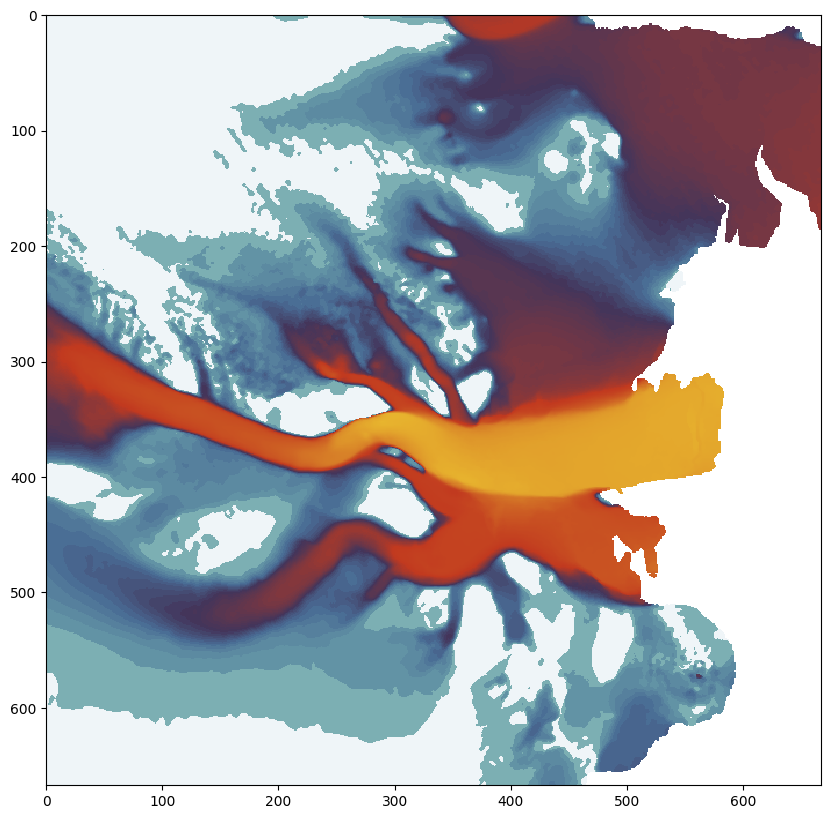

In [4]:
plt.figure(figsize = (10, 10))
plt.pcolor(vel.magnitude, 
           cmap = icevel_cmap, vmin = 0, vmax = 2500)
# Needs to be inverted to match the original image orientation
plt.gca().invert_yaxis()
plt.show()